## Imports

In [31]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt

## create device

In [32]:
# pip install PennyLane-SF for strawberryfields.fock
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

## Define NN Layer

In [33]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

## Build neural nw model

In [34]:
@qml.qnode(dev)
def quantum_neural_net(var, x):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

## Loss and cost function

In [35]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def cost(var, features, labels):
    preds = [quantum_neural_net(var, x) for x in features]
    return square_loss(labels, preds)

## Load Data

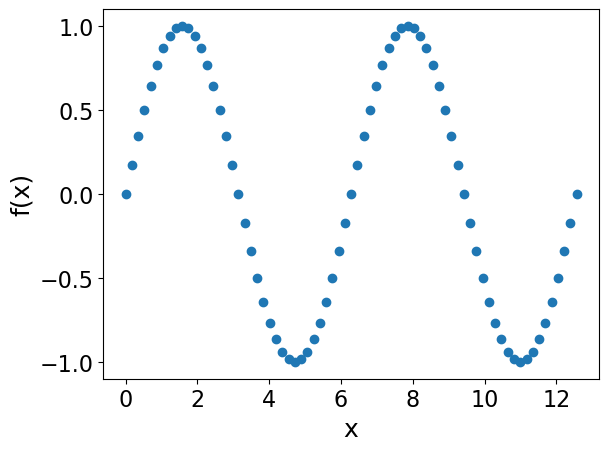

In [36]:
data = np.loadtxt("./sine_fun.txt")
X = np.array(data[:, 0], requires_grad=False)
Y = np.array(data[:, 1], requires_grad=False)

plt.figure()
plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

## init network

In [37]:
np.random.seed(0)
num_layers = 4
var_init = 0.05 * np.random.randn(num_layers, 5, requires_grad=True)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]


## init Optimizer

In [42]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init
for it in range(1000):
    (var, _, _), _cost = opt.step_and_cost(cost, var, X, Y)
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it, _cost))

Iter:     0 | Cost: 0.5063799 
Iter:     1 | Cost: 0.5638752 
Iter:     2 | Cost: 0.4603678 
Iter:     3 | Cost: 0.4159919 
Iter:     4 | Cost: 0.4387855 
Iter:     5 | Cost: 0.4306327 
Iter:     6 | Cost: 0.3984591 
Iter:     7 | Cost: 0.3784918 
Iter:     8 | Cost: 0.3816733 
Iter:     9 | Cost: 0.3939717 
Iter:    10 | Cost: 0.3990244 
Iter:    11 | Cost: 0.3941409 
Iter:    12 | Cost: 0.3863103 
Iter:    13 | Cost: 0.3818853 
Iter:    14 | Cost: 0.3825219 
Iter:    15 | Cost: 0.3861513 
Iter:    16 | Cost: 0.3893699 
Iter:    17 | Cost: 0.3898273 
Iter:    18 | Cost: 0.3874391 
Iter:    19 | Cost: 0.3838288 
Iter:    20 | Cost: 0.3807969 
Iter:    21 | Cost: 0.3791761 
Iter:    22 | Cost: 0.3787536 
Iter:    23 | Cost: 0.3788564 
Iter:    24 | Cost: 0.3788936 
Iter:    25 | Cost: 0.3785791 
Iter:    26 | Cost: 0.3779149 
Iter:    27 | Cost: 0.3770745 
Iter:    28 | Cost: 0.3762749 
Iter:    29 | Cost: 0.3756846 
Iter:    30 | Cost: 0.3753792 
Iter:    31 | Cost: 0.3753401 
Iter:   

## Predictions

In [53]:
x_pred = np.linspace(-1, 1, 10000)
predictions = [quantum_neural_net(var, x_) for x_ in x_pred]

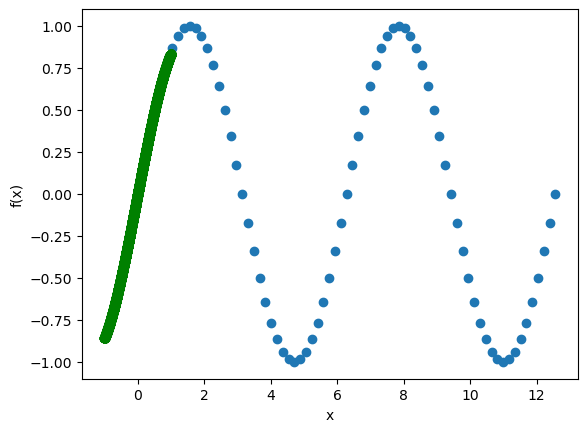

In [54]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(x_pred, predictions, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

In [57]:
x_pred_sine = np.loadtxt("./sine_fun_pred.txt")
predictions_sine = [quantum_neural_net(var, x_) for x_ in x_pred_sine]
predictions_sine

[tensor(-0.00176634, requires_grad=True),
 tensor(0.17785864, requires_grad=True),
 tensor(0.35051186, requires_grad=True),
 tensor(0.5101027, requires_grad=True),
 tensor(0.65074964, requires_grad=True),
 tensor(0.76722439, requires_grad=True),
 tensor(0.8559874, requires_grad=True),
 tensor(0.91682461, requires_grad=True),
 tensor(0.95406111, requires_grad=True),
 tensor(0.97510741, requires_grad=True),
 tensor(0.98472593, requires_grad=True),
 tensor(0.97736322, requires_grad=True),
 tensor(0.93452891, requires_grad=True),
 tensor(0.83336098, requires_grad=True),
 tensor(0.66379626, requires_grad=True),
 tensor(0.44218381, requires_grad=True),
 tensor(0.20934776, requires_grad=True),
 tensor(0.01270513, requires_grad=True),
 tensor(-0.11542455, requires_grad=True),
 tensor(-0.16922913, requires_grad=True),
 tensor(-0.16560498, requires_grad=True),
 tensor(-0.13103809, requires_grad=True),
 tensor(-0.0888828, requires_grad=True),
 tensor(-0.05305879, requires_grad=True),
 tensor(-0.0

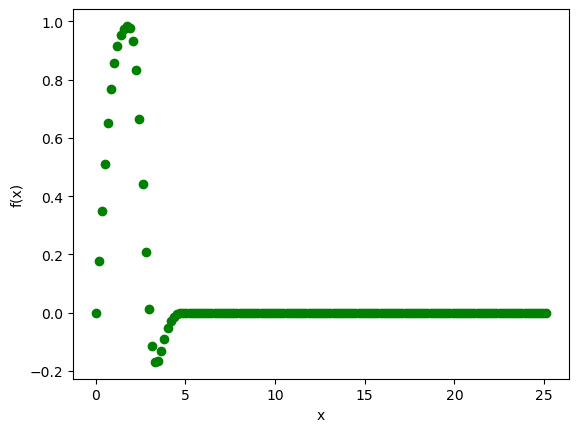

In [56]:
plt.figure()
plt.scatter(x_pred_sine, predictions_sine, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

In [45]:
for in range(0, )

SyntaxError: invalid syntax (1941089913.py, line 1)